In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [60]:
from network.models.building_blocks.resnet import resnet34
from input.coil_dataset import CoILDataset
from torch.autograd import Variable
from configs.coil_global import _g_conf
from ipywidgets import interact
from IPython import display
from scipy.misc import imresize
import time

In [8]:
_g_conf.TRAIN_DATASET_NAME = 'CARLA100'

In [74]:
dataset = CoILDataset('/mnt/local/', None, '1hour_train')
model = resnet34(pretrained=False)

 Loading from NPY 
['episode_00000/CentralRGB_00000.png' 'episode_00000/LeftRGB_00000.png'
 'episode_00000/RightRGB_00000.png' ...
 'episode_00005/CentralRGB_02161.png' 'episode_00005/LeftRGB_02161.png'
 'episode_00005/RightRGB_02161.png']


In [14]:
def forward(self, x):
    print (x.shape)
    x = self.conv1(x)
    print ('conv1', x.shape)
    x = self.bn1(x)
    x = self.relu(x)
    print (x.shape)
    x = self.maxpool(x)
    print (x.shape)

    x1 = self.layer1(x)
    print ('layer1', x1.shape)
    x2 = self.layer2(x1)
    print ('layer2', x2.shape)
    x3 = self.layer3(x2)
    print ('layer3', x3.shape)
    x4 = self.layer4(x3)
    print ('layer4', x4.shape)

    x5 = self.avgpool(x4)
    print ('layer5', x5.shape)
    x = x5.view(x.size(0), -1)
    print ('layer6', x.shape)
    x = self.fc(x)
    print ('layer7', x.shape)


    return x, x1, x2, x3, x4, x5

/mnt/local/CARLA100/episode_00000/CentralRGB_00000.png


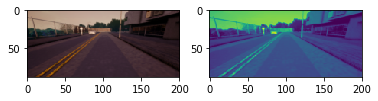

In [62]:
fig, (ax1, ax2) = subplots(1, 2)

img = dataset[0]['rgb'].cpu().numpy().transpose(1, 2, 0)[:, :, ::-1]
p1 = ax1.imshow(img)
p2 = ax2.imshow(img[:, :, 0])

In [72]:
def make_image(index):
    img = dataset[index]['rgb']
    X = Variable(img.unsqueeze(0))
    #p1.set_data(img.cpu().numpy().transpose(1, 2, 0)[:, :, ::-1])
    p1.set_data(img.cpu().numpy().transpose(1, 2, 0)[:, :, ::-1])
    
    Y = forward(model, X)
    att = Y[1].sum(1)[0].data.cpu().numpy()
    att = imresize(att, [88, 200])
    # p2.set_data(att)
    p2.set_data(att)
    p2.set_clim(att.min(), att.max())
    display.clear_output(wait=True)
    figsize(10, 10)
    # display.display(fig)
    return fig

_ = interact(make_image, index=(0, len(dataset)-1))


interactive(children=(IntSlider(value=18914, description='index', max=37829), Output()), _dom_classes=('widget…

In [ ]:
X = Variable(X.unsqueeze(0))
print(X.shape)

In [15]:
Y = forward(model, X)

torch.Size([1, 3, 88, 200])
conv1 torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 44, 100])
torch.Size([1, 64, 22, 50])
layer1 torch.Size([1, 64, 22, 50])
layer2 torch.Size([1, 128, 11, 25])
layer3 torch.Size([1, 256, 6, 13])
layer4 torch.Size([1, 512, 3, 7])
layer5 torch.Size([1, 512, 1, 3])
layer6 torch.Size([1, 1536])
layer7 torch.Size([1, 1000])


In [17]:
att = Y[1].sum(1)[0].data.cpu().numpy()
print(att.shape)

(22, 50)


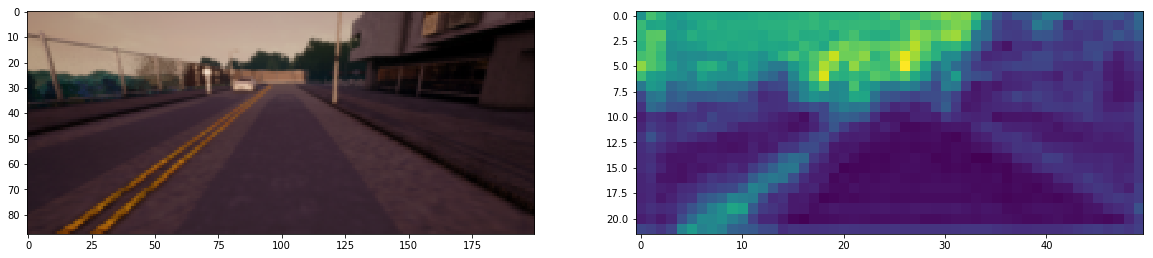

In [27]:
subplot(121)
x = X[0].data.cpu().numpy().transpose(1, 2, 0)[:, :, ::-1]
imshow(x)
subplot(122)
imshow(att)
figsize(20, 20)